##  Support Vector Machines (Hands-On)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.svm import SVC
import sklearn.datasets as datasets
from sklearn import decomposition

In [2]:
def plotData(X, y):
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    
    plt.scatter(X[pos,0], X[pos,1], s=60, c='k', marker='+', linewidths=1)
    plt.scatter(X[neg,0], X[neg,1], s=60, c='y', marker='o', linewidths=1)

In [3]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plotData(X, y)
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='X', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

#### Toy Dataset

In [4]:
data1 = loadmat('svmdata/svmdata1.mat')

In [5]:


y1 = data1['y']
X1 = data1['X']

print('X1:', X1.shape)
print('y1:', y1.shape)



X1: (51, 2)
y1: (51, 1)


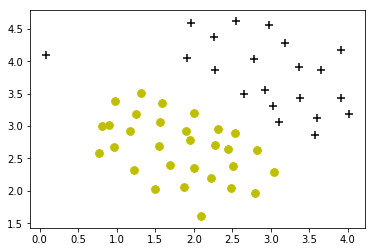

In [6]:
plotData(X1,y1)

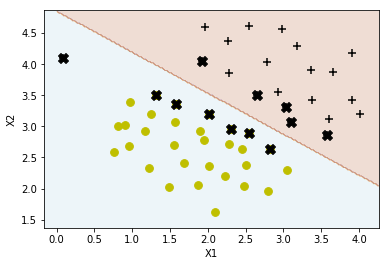

Number of support vectors:  12


In [13]:
clf = SVC(C=1.0, kernel='linear')
clf.fit(X1, y1.ravel())
plot_svc(clf, X1, y1)


In [14]:
sv = clf.support_vectors_
sv

array([[1.5841  , 3.3575  ],
       [2.0103  , 3.2039  ],
       [2.3099  , 2.9584  ],
       [2.8283  , 2.6309  ],
       [1.3191  , 3.5109  ],
       [2.5403  , 2.8867  ],
       [3.5772  , 2.856   ],
       [3.1048  , 3.0709  ],
       [1.9182  , 4.0534  ],
       [2.6555  , 3.5008  ],
       [3.0357  , 3.3165  ],
       [0.086405, 4.1045  ]])

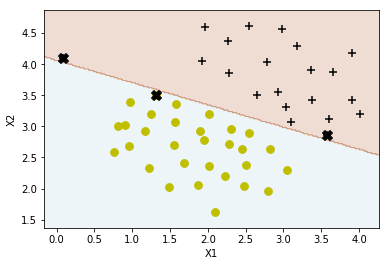

Number of support vectors:  3


In [15]:
clf.set_params(C=100)
clf.fit(X1, y1.ravel())
plot_svc(clf, X1, y1)

### Cancer Dataset

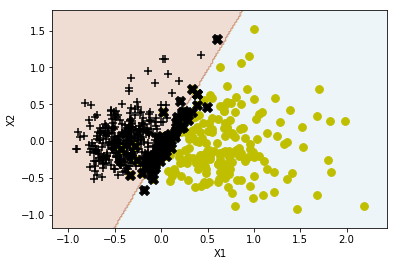

Number of support vectors:  73


In [19]:
cancerdata=datasets.load_breast_cancer()
X = pd.DataFrame(cancerdata.data, columns=cancerdata.feature_names)
y = cancerdata.target
X = (X - np.mean(X))/(np.max(X) - np.min(X))
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
clf = SVC(C=1000.0, kernel='linear')
clf.fit(X, y.ravel())
plot_svc(clf, X, y)

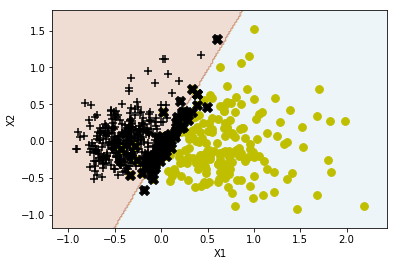

Number of support vectors:  73


In [72]:
clf.set_params(C=10000)
clf.fit(X, y.ravel())
plot_svc(clf, X, y)

In [11]:
def gaussianKernel(x1, x2, sigma=2):
    norm = (x1-x2).T.dot(x1-x2)
    return(np.exp(-norm/(2*sigma**2)))

def build_gaussian(sigma):

    def gaussian(_x1, _x2):
        norm = (_x1-_x2).T.dot(_x1-_x2)
        return(np.exp(-norm/(2*sigma**2)))
    return gaussian

In [12]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussianKernel(x1, x2, sigma)

0.32465246735834974

#### Non linearly Seperable Dataset

In [73]:
data2 = loadmat('svmdata/svmdata2.mat')

In [74]:
y2 = data2['y']
X2 = data2['X']

print('X2:', X2.shape)
print('y2:', y2.shape)

X2: (863, 2)
y2: (863, 1)


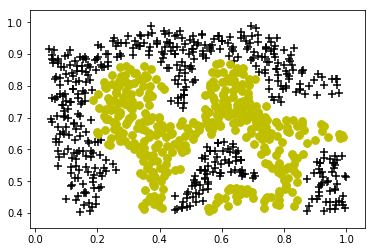

In [75]:
plotData(X2, y2)

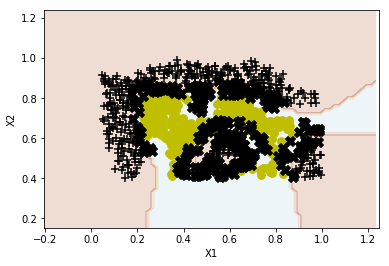

Number of support vectors:  254


In [76]:
clf2 = SVC(C=50, kernel='rbf', gamma=6)
clf2.fit(X2, y2.ravel())
plot_svc(clf2, X2, y2)

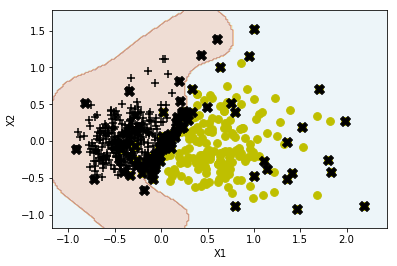

Number of support vectors:  95


In [77]:
clf2 = SVC(C=20, kernel='rbf', gamma=6)
clf2.fit(X, y.ravel())
plot_svc(clf2, X, y)

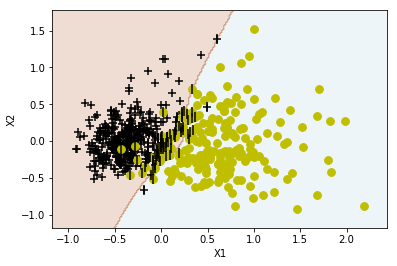

Number of support vectors:  88


In [18]:
clf2 = SVC(C=20, kernel='poly', gamma=6)
clf2.fit(X, y.ravel())
plot_svc(clf2, X, y)

#### Example Dataset 3